In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [7]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)

In [8]:
print("The first 5 rows od the dataframe")
df.head(5)

The first 5 rows od the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [9]:
"""Task 1 : Single Linear Regression
You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the 
different features of the dataset. Create a single feature Linear Regression model that 
fits the pair of "CPU_frequency" and "Price" to find the model for prediction."""

'Task 1 : Single Linear Regression\nYou have learnt that "CPU_frequency" is the parameter with the lowest p-value among the \ndifferent features of the dataset. Create a single feature Linear Regression model that \nfits the pair of "CPU_frequency" and "Price" to find the model for prediction.'

In [10]:
lm = LinearRegression()
X = df[['CPU_frequency']]
Y = df[['Price']]
lm.fit(X,Y)

Yhat = lm.predict(X)

In [11]:
"""Generate the Distribution plot for the predicted values and that of the actual values. 
How well did the model perform?"""

'Generate the Distribution plot for the predicted values and that of the actual values. \nHow well did the model perform?'

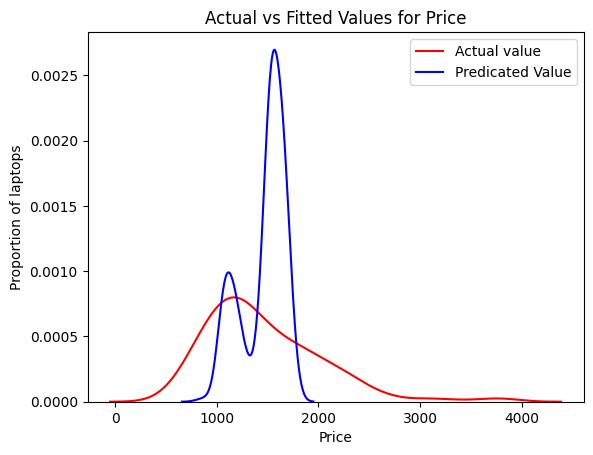

In [12]:
ax1 = sns.distplot(df['Price'], hist=False, color='r', label='Actual Value')

sns.distplot(Yhat, hist=False, color = 'b', label = 'Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual value', 'Predicated Value'])
plt.show()

In [13]:
"""Evaluate the Mean Squared Error and R^2 score values for the model."""

'Evaluate the Mean Squared Error and R^2 score values for the model.'

In [14]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('R2: ', r2_score_slr)
print('MSE: ', mse_slr)

R2:  0.1344436321024326
MSE:  284583.4405868629


In [15]:
"""Task 2 - Multiple Linear Regression¶
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are
'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. 
Use all these variables to create a Multiple Linear Regression system."""

"Task 2 - Multiple Linear Regression¶\nThe parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are\n'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. \nUse all these variables to create a Multiple Linear Regression system."

In [17]:
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z, Y)
Y_hat = lm1.predict(Z)

In [18]:
"""Plot the Distribution graph of the predicted values as well as the Actual values"""

'Plot the Distribution graph of the predicted values as well as the Actual values'

Text(0, 0.5, 'Proportion of laptops')

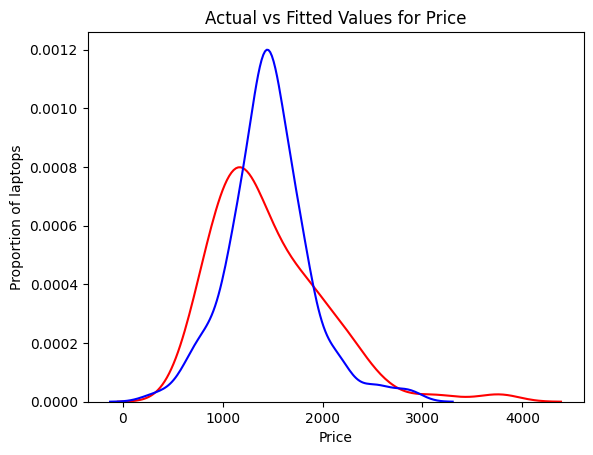

In [20]:
ax1 = sns.distplot(df['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')